In [310]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [311]:
from sklearn.datasets import make_blobs

In [312]:
x,y=make_blobs(n_samples=1000,n_features=2,centers=4,cluster_std=0.7,random_state=42)


In [313]:
x.shape

(1000, 2)

In [314]:
X=torch.tensor(x).type(torch.float32)

In [315]:
X.dtype


torch.float32

In [316]:
Y=torch.tensor(y).type(torch.float32)

In [317]:
Y.dtype
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_train=X_train.to('mps')
X_test=X_test.to('mps')
Y_train=Y_train.to('mps')
Y_test=Y_test.to('mps')

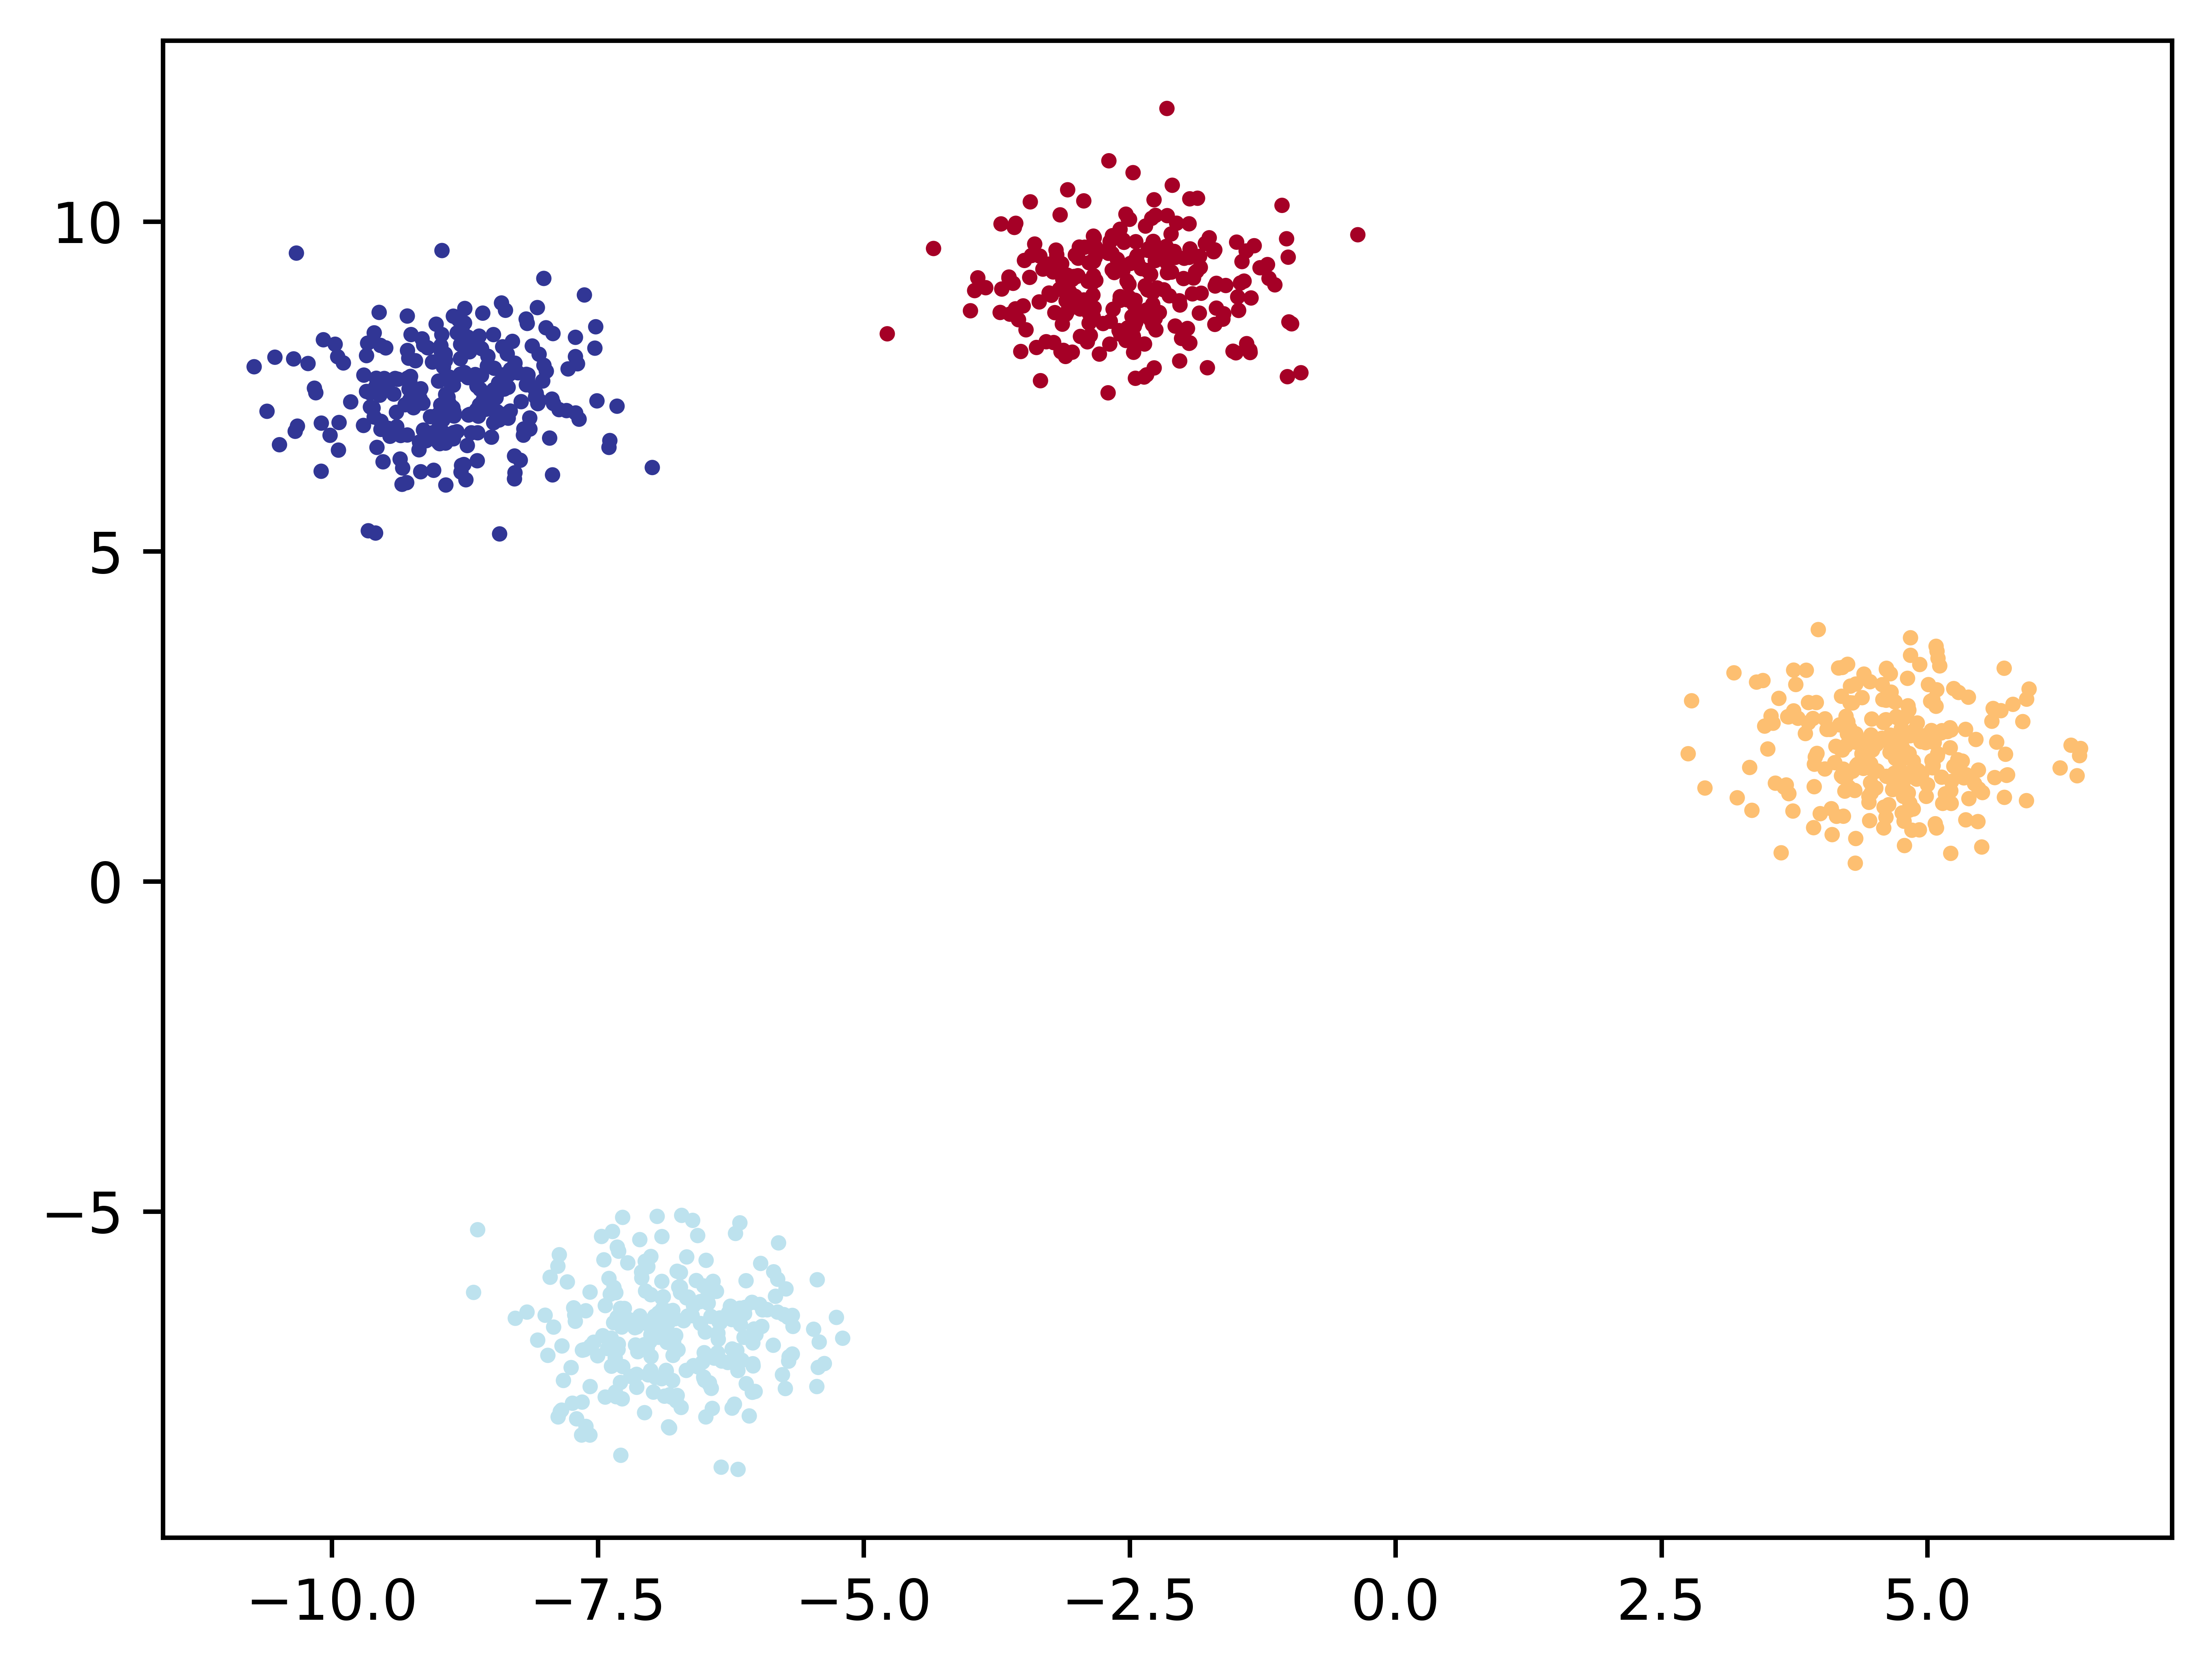

In [318]:
plt.figure(dpi=1000)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu,s=3)

In [319]:
loss_fn=nn.CrossEntropyLoss()
device='mps' if torch.backends.mps.is_available() else 'cpu'

In [320]:
model=nn.Sequential(
    nn.Linear(2,10),
    nn.ReLU(),
    nn.Linear(10,10),
    nn.ReLU(),
    nn.Linear(10,4)
).to(device)

In [321]:
model.state_dict()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.01)
def accuracy_fn(y_true,y_pred):

    correct=torch.eq(y_true,y_pred).sum().item()
    return (correct/len(y_true))*100

In [322]:
epoch=1000

from tqdm.auto import tqdm
l=[]
a=[]
for i in tqdm(range(epoch)):
    model.train()
    y_pred=model(X_train)
    loss=loss_fn(y_pred,Y_train)
    l.append(loss.to('cpu').detach().numpy())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #print(loss.item())
    
    a.append(accuracy_fn(Y_train,torch.argmax(torch.round(torch.softmax(y_pred,dim=1)),dim=1)))
    

  0%|          | 0/1000 [00:00<?, ?it/s]

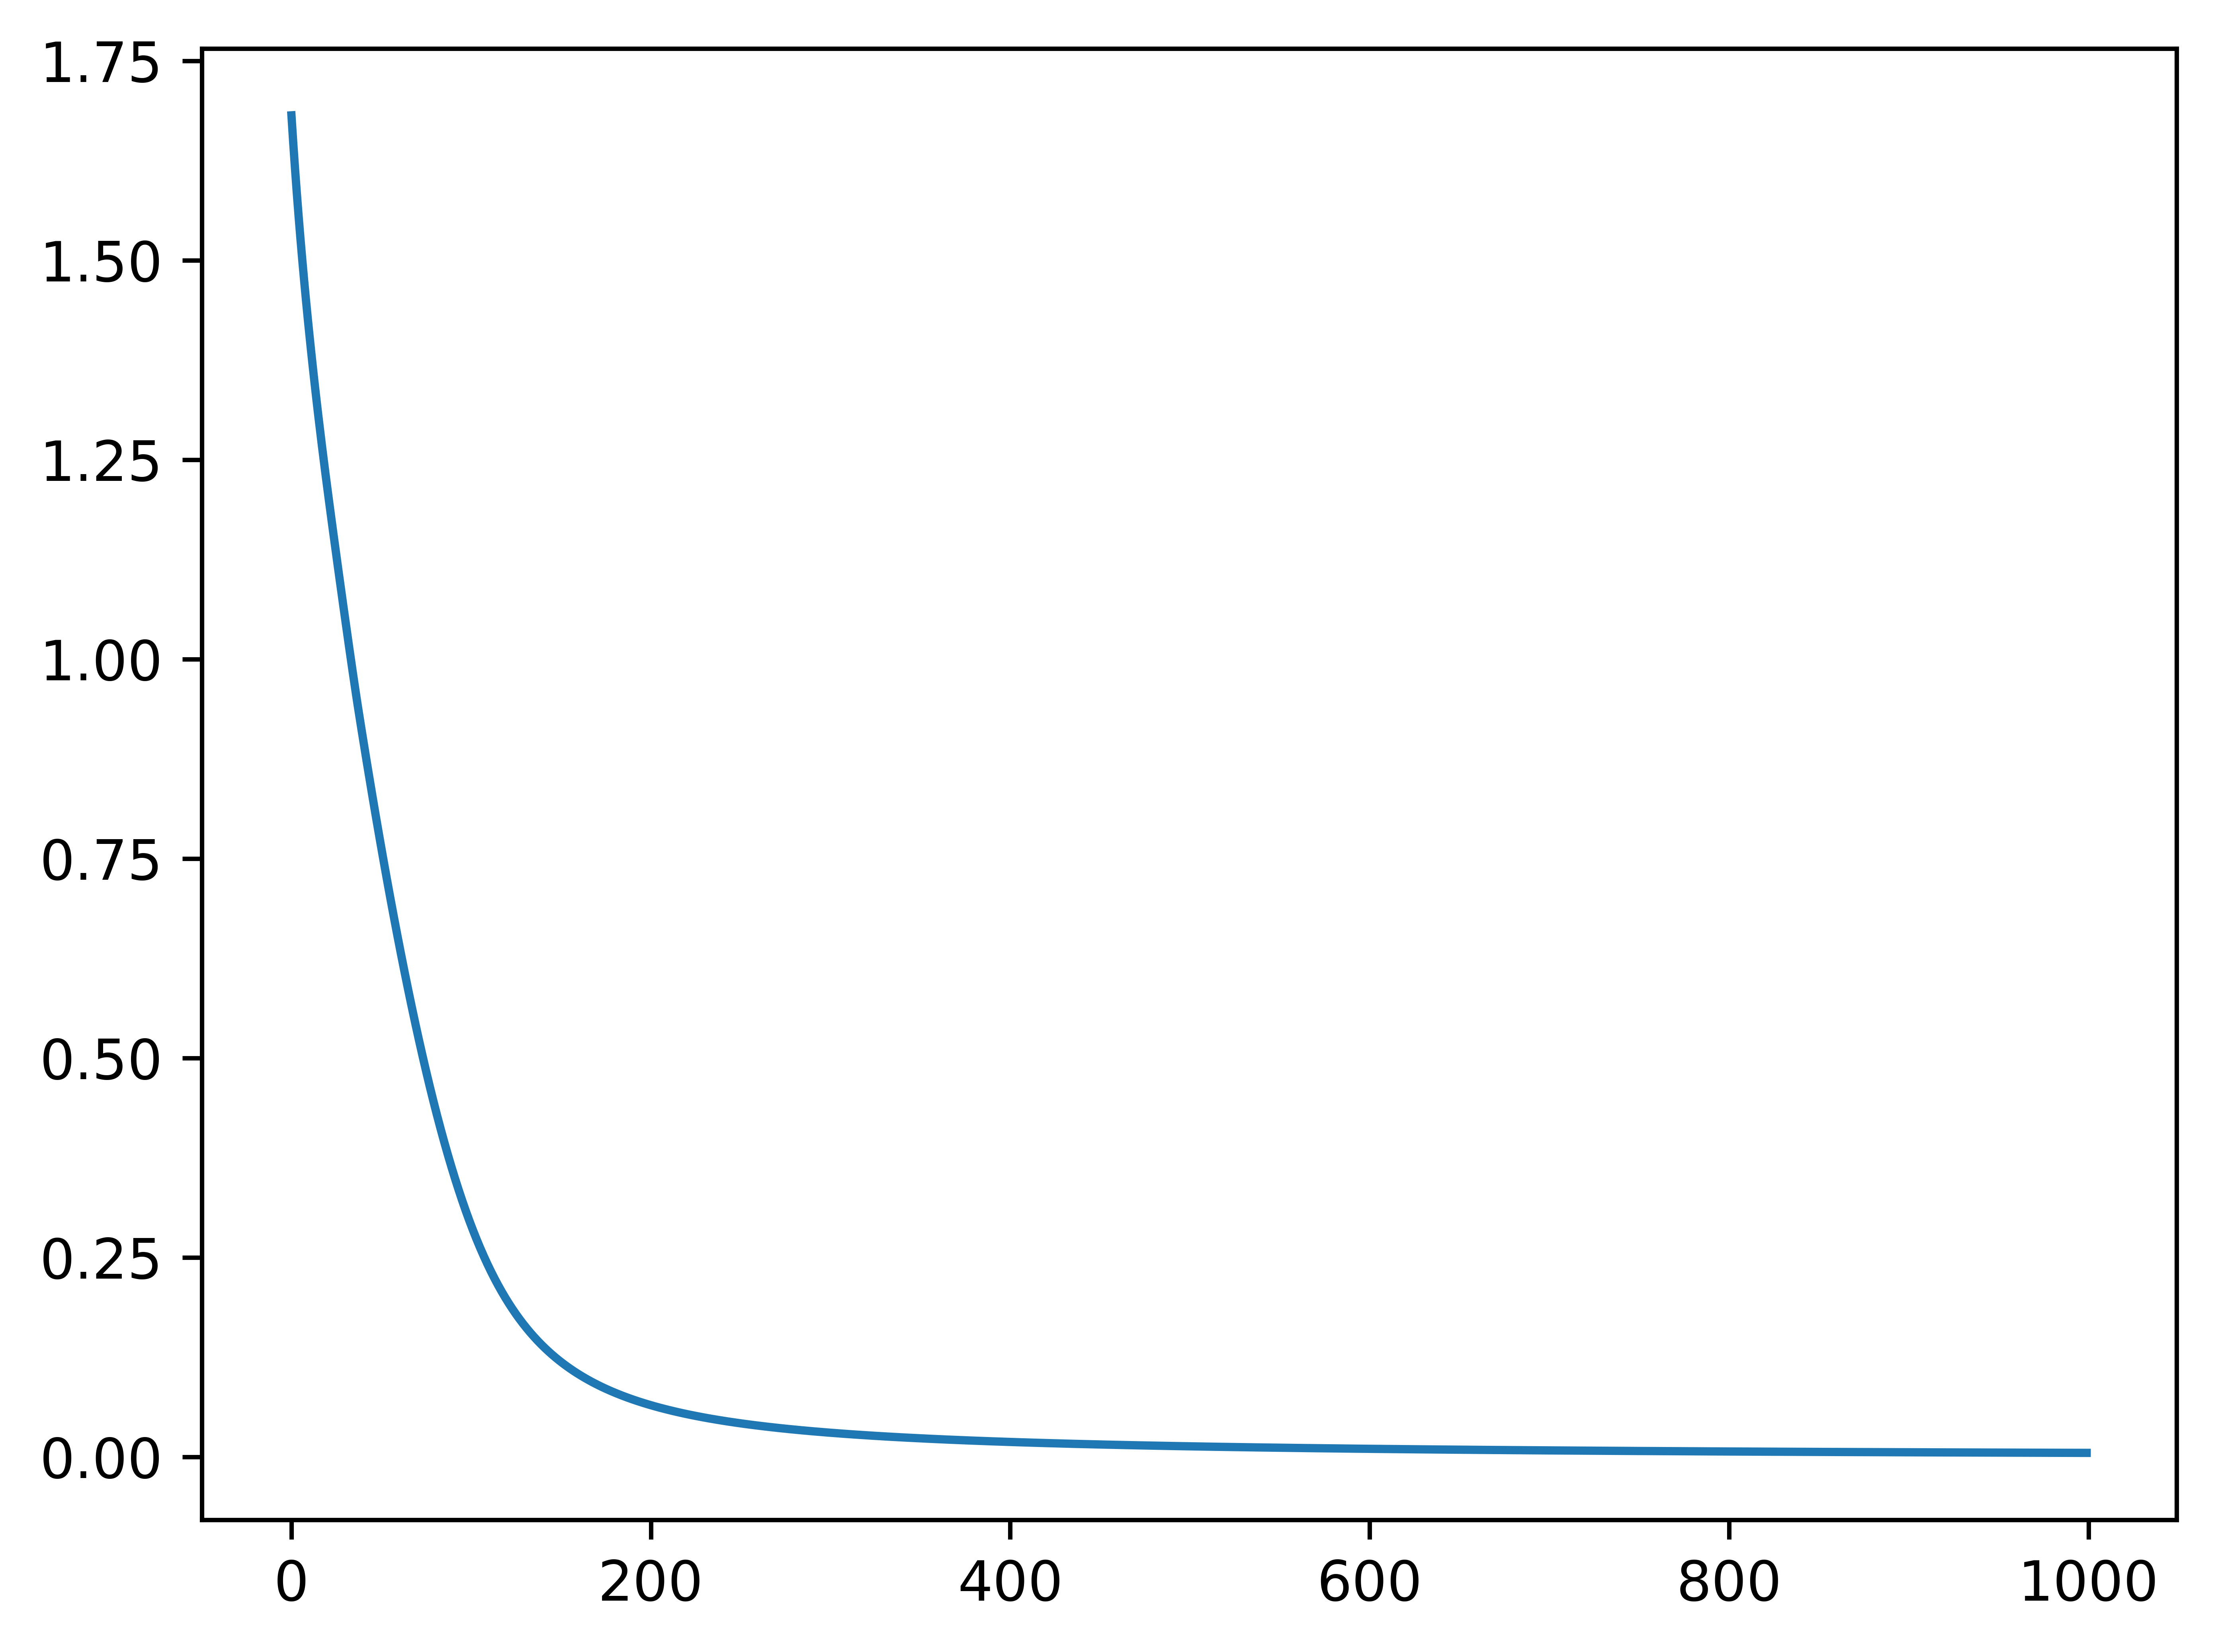

In [323]:
plt.figure(dpi=1000)
plt.plot(l)

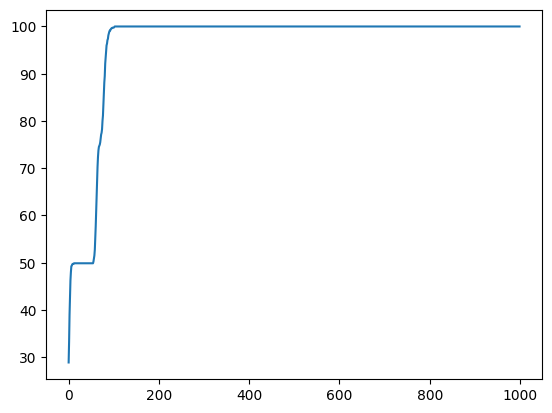

In [324]:
plt.plot(a)